# Introduction aux séries temporelles

## Définition Séries temporelles

Les séries temporelles (*time series*) constituent une forme importante de données structurées dans de nombreux domaines différents, tels que la finance, l'économie, l'écologie, la neurosciences et la physique. Tout ce qui est enregistré de manière répétée à de nombreux moments dans le temps forme une série temporelle. De nombreuses séries temporelles ont une fréquence fixe, que nous avons une observation à des intervalles réguliers selon une certaine règle, comme toutes les 15 secondes, toutes les 5 minutes ou une fois par mois. Les séries temporelles peuvent également être irrégulières sans unité de temps fixe. La façon dont les données de séries temporelles sont organisées dépend de l'application, et on voit souvent les 3 cas de figures suivants :

* *Timestamps*: instants spécifiques dans le temps

* Intervalle de temps: Indiqué par un *timestamps* de début et de fin. 

* Périodes fixes: par mois, année ou trimestre. Les périodes fixes peuvent être considérées comme des cas spéciaux d'intervalles de temps.

Pour certains exemples de ce cours, nous allons utiliser des données boursières. Étant donné que Pandas a été largement développé dans un contexte financier, cette librairie contient des outils très spécifiques pour les données financières. Par exemple, la librairie `pandas-datareader` permet d'importer des données financières à partir de diverses sources disponibles (https://pandas-datareader.readthedocs.io/en/latest/remote_data.html).

In [18]:
#import sys
#!{sys.executable} -m pip install pandas_datareader
from pandas_datareader.data import DataReader

In [19]:
# On importe les données concernant la valeur de l'action de Google de 2014 à 2023
goog = DataReader('GOOG','stooq', start='2014', end='2023')
# Pour les prochains exemples,
# on conserve seulement la valeur quotidienne de l'action à la fermeture de la bourse
goog = goog['Close']

In [20]:
goog.head()

Date
2022-12-30    88.73
2022-12-29    88.95
2022-12-28    86.46
2022-12-27    87.93
2022-12-23    89.81
Name: Close, dtype: float64

In [21]:
goog=goog.sort_index()
goog.head()

Date
2014-03-27    27.9230
2014-03-28    27.9995
2014-03-31    27.8485
2014-04-01    28.3580
2014-04-02    28.3500
Name: Close, dtype: float64

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<Axes: xlabel='Date'>

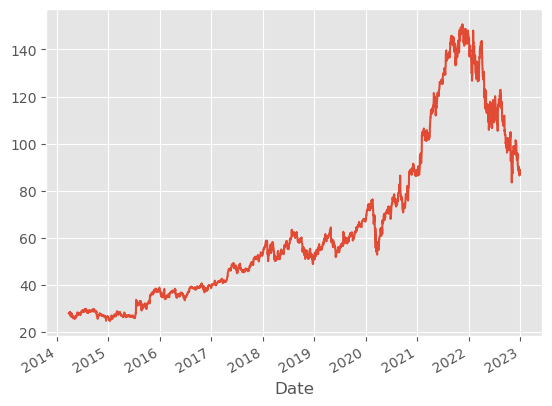

In [23]:
goog.plot()

## Rééchantillonnage (*Resampling*)

Le rééchantillonnage dans les séries temporelles consiste à ajuster les données à une fréquence différente. Il existe deux types de rééchantillonage:
* *down-sampling* : agrégation ou sélection des données à une fréquence plus basse (par exemple, de données quotidiennes à mensuelles) 
* *up-sampling*: interpolation des données à une fréquence plus élevée (par exemple, de données mensuelles à quotidiennes).

### *Down-sampling*
Avec Pandas, on peut agréger des données de séries temporelles à l'aide de la fonction `resample()`.
Cette fonction prend en argument une chaîne de caractères indiquant sur quelle fréquence on veut faire l'aggrégation. Voici un lien vers la liste des chaînes de caractères acceptées: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects
Cette fonction s'applique seulement sur des objets (DataFrame ou Serie) qui ont un index de type *datetime*. Voici le lien vers la documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

Plutôt que d'agréger, on pourrait vouloir sélectionner des données à une certaine fréquence (fin du mois, fin du trimestre etc.). On peut utiliser la fonction `asfreq()`pour faire cette opération. Cette fonction prend en argument une chaîne de caractère indiquant la fréquence.

In [24]:
# Exemple avec resample Business year end
# Chacune des valeurs est la moyenne des valeurs antérieures (durant la même année)
goog.resample('BA').mean()

Date
2014-12-31     27.709245
2015-12-31     30.121056
2016-12-30     37.174361
2017-12-29     46.088980
2018-12-31     55.661396
2019-12-31     59.419752
2020-12-31     74.070191
2021-12-31    125.530657
2022-12-30    115.193713
2023-12-29           NaN
Freq: BA-DEC, Name: Close, dtype: float64

In [25]:
# Exemple avec asfreq Business year end
# On sélectionne la valeur qui correspond au Business Year End pour chaque année
# Notez ici qu'on n'a pas de valeur pour 2023 car le BYE n'est pas dans nos données d'origine
goog.asfreq('BA')

Date
2014-12-31     26.3200
2015-12-31     37.9440
2016-12-30     38.5910
2017-12-29     52.3200
2018-12-31     51.7805
2019-12-31     66.8510
2020-12-31     87.5940
2021-12-31    144.6800
2022-12-30     88.7300
Freq: BA-DEC, Name: Close, dtype: float64

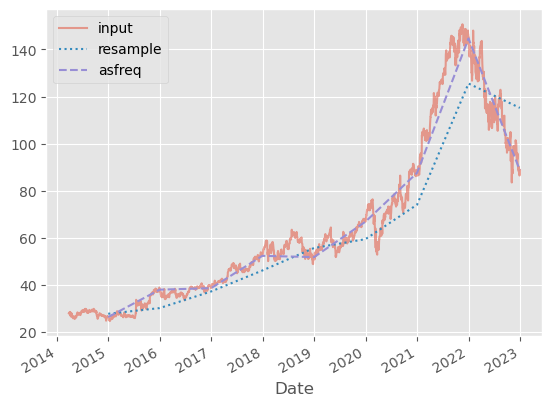

In [26]:
# Graphique des 2 méthodes
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')

#### Open-high-low-close (OHLC) resampling
En finance, une méthode populaire est d'agréger les données de quatre façon différente sur la même période: 
* la première donnée sur la période (open)
* le maximum atteint dans la période (high)
* le minimum atteint dans la période (low) 
* la dernière donnée sur la période (close)

In [27]:
goog.resample("W").ohlc()

,open,high,low,close
Date,,,,
2014-03-30,27.9230,27.9995,27.923,27.9995
2014-04-06,27.8485,28.4870,27.157,27.1570
2014-04-13,26.9075,28.2070,26.530,26.5300
2014-04-20,26.6260,27.8270,26.626,26.8050
2014-04-27,26.4310,26.7405,25.809,25.8090
...,...,...,...,...
2022-12-04,96.2500,101.4500,95.440,100.8300
2022-12-11,99.8700,99.8700,93.070,93.0700
2022-12-18,93.5600,95.8500,90.860,90.8600


### *Up-sampling*

Les méthodes `resample()` et `asfreq()` peuvent être utilisée pour faire du *up-sampling*. La méthode par défaut est de laisser les points où on n'a pas de données à *NaN* (valeur manquante). Toutefois, avec `asfreq()` on peut spécifier avec l'argument `method` comment on voudrait remplir ces valeurs.

Voici les méthodes que l'on peut utiliser pour imputer les valeurs manquantes générées:
* *ffill*: utilise la valeur de la dernière observation (qui n'est pas NaN)

* *bfill*: utilise la valeur de la prochaine observation (qui n'est pas NaN)

In [28]:
# Démonstration de l'équivalence de asfreq et resample pour du up-sampling
data = goog.iloc[-9:]
print(data)
print(data.asfreq('D'))
print(data.resample('D').mean())

Date
2022-12-19    89.15
2022-12-20    89.63
2022-12-21    90.25
2022-12-22    88.26
2022-12-23    89.81
2022-12-27    87.93
2022-12-28    86.46
2022-12-29    88.95
2022-12-30    88.73
Name: Close, dtype: float64
Date
2022-12-19    89.15
2022-12-20    89.63
2022-12-21    90.25
2022-12-22    88.26
2022-12-23    89.81
2022-12-24      NaN
2022-12-25      NaN
2022-12-26      NaN
2022-12-27    87.93
2022-12-28    86.46
2022-12-29    88.95
2022-12-30    88.73
Freq: D, Name: Close, dtype: float64
Date
2022-12-19    89.15
2022-12-20    89.63
2022-12-21    90.25
2022-12-22    88.26
2022-12-23    89.81
2022-12-24      NaN
2022-12-25      NaN
2022-12-26      NaN
2022-12-27    87.93
2022-12-28    86.46
2022-12-29    88.95
2022-12-30    88.73
Freq: D, Name: Close, dtype: float64


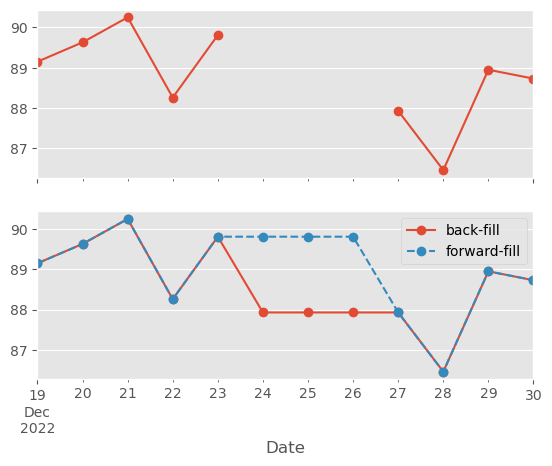

In [29]:
# Exemple de up-sampling avec une fréquence journalière (incluant les week-ends)

fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[-9:]
#print(data)
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

## Chevauchement (*Time-shift*)
Une opération très commune sur des séries temporelle est le chevauchement (*time-shif*). Cela est utile quand on veut voir la différence entre des valeurs pour une variable données pour au même moment mais à une autre période. Par exemple, si on veut comparer nos ventes totales obtenue jusquà maintenant à celle qu'on avait à pareil date au mois dernier (ou l'année dernière !).

Il existe une méthode pour réaliser cela avec Pandas: `shift()`.

La méthode `shift()` déplace les valeurs selon le nombre de période par lequel on veut décaler les données. Elle prend en argument le nombre de période `periods` (par défaut, 1). On peut spécifier une fréquence à laquelle on veut appliquer le nombre de période spécifié avec l'argument `freq`. S'il n'y a pas de fréquence spécifiée, l'indice de temps sera préservé et les données décalées. Si la fréquence est spécifiée, l'indice de temps sera prolongé du nombre de période et les données seront décalées.

Voici le lien vers la documentation:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [30]:
# Données fictive
import pandas as pd
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [31]:
# Sans fréquence spécifiée
df.shift(periods=3)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [32]:
df.shift(periods=-3)

,Col1,Col2,Col3
2020-01-01,30.0,33.0,37.0
2020-01-02,45.0,48.0,52.0
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN


In [33]:
# Avec une fréquence (journalière)
# on voit que l'index a glissé ici et non pas les données
df.shift(periods=3, freq="D")

,Col1,Col2,Col3
2020-01-04,10,13,17
2020-01-05,20,23,27
2020-01-06,15,18,22
2020-01-07,30,33,37
2020-01-08,45,48,52


In [34]:
# Avec une fréquence (mensuelle (début du mois))
# Nos données sont toutes dans le même mois donc on a le même indice qui se répète
df.shift(periods=1, freq="MS")

,Col1,Col2,Col3
2020-02-01,10,13,17
2020-02-01,20,23,27
2020-02-01,15,18,22
2020-02-01,30,33,37
2020-02-01,45,48,52


In [35]:
# Données fictive
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-05-01",freq='MS'))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-02-01,20,23,27
2020-03-01,15,18,22
2020-04-01,30,33,37
2020-05-01,45,48,52


In [36]:
# Avec une fréquence (mensuelle)
# Nos données sont à des mois différents, l'indice est décalée de 1 mois.
df.shift(periods=1, freq="MS")

,Col1,Col2,Col3
2020-02-01,10,13,17
2020-03-01,20,23,27
2020-04-01,15,18,22
2020-05-01,30,33,37
2020-06-01,45,48,52


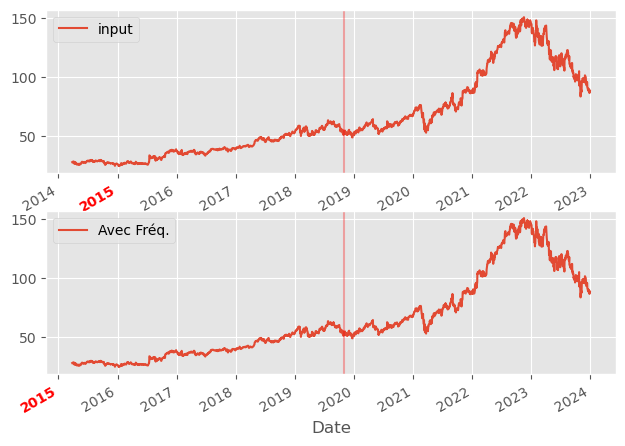

In [37]:
#les 2 graph. partagent le meme axe des y
fig, ax = plt.subplots(2, sharey=True)

fig.tight_layout(pad=1.0)
goog.plot(ax=ax[0])
goog.shift(365,freq='D').plot(ax=ax[1])

# pour démontrer l'impact du time-shift
# on crée une ligne en date de 2018-11-01 et un offset de 365 jours
local_max = pd.to_datetime('2018-11-01')
offset = pd.Timedelta(365, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')


ax[1].legend(['Avec Fréq.'], loc=2)
ax[1].get_xticklabels()[1].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

### Exemple
Un exemple concret d'utilisation du *time-shift* est le calcul du retour sur investissement (*ROI*) de l'achat d'une action.
$$ \text{ROI} = \left( \frac{\text{Gain financier}}{\text{Coût de l'investissement initial}}\right) \times 100\% $$
Calculons le ROI sur 1 an pour toutes les occurences du *DataFrame* et créons un graphique à ligne afin de voir l'évolution de celui-ci.

In [74]:
#Prix achat
goog_D=goog.asfreq('D')
goog_D

Date
2014-03-27    27.9230
2014-03-28    27.9995
2014-03-29        NaN
2014-03-30        NaN
2014-03-31    27.8485
               ...   
2022-12-26        NaN
2022-12-27    87.9300
2022-12-28    86.4600
2022-12-29    88.9500
2022-12-30    88.7300
Freq: D, Name: Close, Length: 3201, dtype: float64

In [75]:
#Prix vente
goog_D.shift(-365)

Date
2014-03-27    27.4170
2014-03-28        NaN
2014-03-29        NaN
2014-03-30    27.6015
2014-03-31    27.4000
               ...   
2022-12-26        NaN
2022-12-27        NaN
2022-12-28        NaN
2022-12-29        NaN
2022-12-30        NaN
Freq: D, Name: Close, Length: 3201, dtype: float64

In [76]:
# La valeur au 2014-03-27 avec shift est la valeur au 2015-03-27 
goog_D['2015-03-27']

27.417

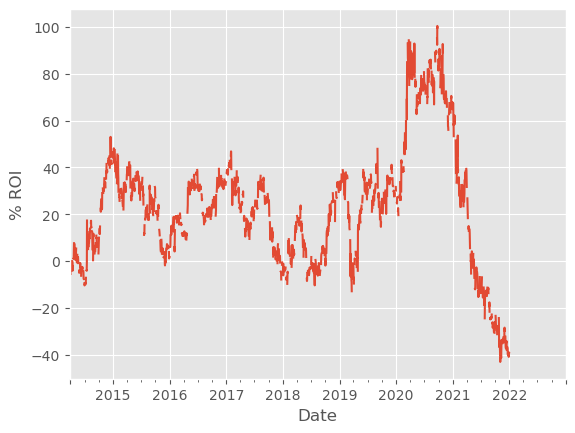

In [77]:
ROI = 100 * (goog_D.shift(-365) / goog_D - 1)
ROI.plot()
plt.ylabel('% ROI');

## Fenêtre glissante (*Rolling Window*)
Un autre type d'opérations propre aux séries temporelles est la fenêtre glissante (*rolling window*).
Cet opération est appliqué à un sous-ensemble continu de données qui se déplace progressivement à travers l'ensemble des données.

Pour mieux comprendre, imaginez une série temporelle qui représente des données sur une période de temps donnée, par exemple, les ventes quotidiennes d'un produit sur un an. Si vous utilisez une fenêtre glissante de 30 jours, l'algorithme effectuera une opération (comme la moyenne, la somme, ou tout autre calcul) sur les données des 30 premiers jours, puis glissera d'un jour, recalculera l'opération sur les 30 jours suivants, puis glissera à nouveau, et ainsi de suite, jusqu'à ce que toute la série temporelle soit parcourue.

L'application d'une fenêtre glissante peut aider à lisser les fluctuations dans les données, mettant en évidence des tendances à plus long terme.

En analysant les données dans des fenêtres glissantes, il est possible de détecter des points de données qui se comportent de manière anormale par rapport à leur contexte local.

La fonction `rolling()` de Pandas nous permet d'effectuer cette opération. Cette fonction prend en argument la grandeur de la fenêtre. Elle a aussi un argument `center` permettant de spécifier à quelle *timestamps* on veut associer l'aggrégation effectuée sur la plage de données (fenêtre).

In [39]:
Center_True = goog.rolling(365, center=True)
Center_False = goog.rolling(365)
data = pd.DataFrame({
                     'Center_True': Center_True.mean(),
                    'Center_False': Center_False.mean()})
# La première valeur est au milieu de la période pour center=True
print(data.iloc[180:185])
# La première valeur est à la fin de la période pour center=False
print(data.iloc[362:368])

            Center_True  Center_False
Date                                 
2014-12-11          NaN           NaN
2014-12-12          NaN           NaN
2014-12-15    27.786278           NaN
2014-12-16    27.793977           NaN
2014-12-17    27.801200           NaN
            Center_True  Center_False
Date                                 
2015-09-02    31.550155           NaN
2015-09-03    31.577132           NaN
2015-09-04    31.605277     27.786278
2015-09-08    31.635258     27.793977
2015-09-09    31.668156     27.801200
2015-09-10    31.699562     27.810019


Comme on a pu le constater dans l'exemple dernier aucune valeur n'est retournée tant qu'on atteint pas le centre spécifié. On peut changer ce comportement en spécifiant combien de période minimale on accepte avant de pouvoir calculer notre aggrégation. L'argument `min_periods` permet de spécifier ce nombre de période.

In [40]:
min_per = goog.rolling(365, min_periods=10).mean()
min_per.iloc[0:15]

Date
2014-03-27          NaN
2014-03-28          NaN
2014-03-31          NaN
2014-04-01          NaN
2014-04-02          NaN
2014-04-03          NaN
2014-04-04          NaN
2014-04-07          NaN
2014-04-08          NaN
2014-04-09    27.898250
2014-04-10    27.820909
2014-04-11    27.713333
2014-04-14    27.629692
2014-04-15    27.572000
2014-04-16    27.589000
Name: Close, dtype: float64

In [41]:
goog.iloc[0:10].mean()

27.89825

### Exemple
Calculons des *rolling windows* qui font la moyenne annuelle des valeurs de l'action de Google.

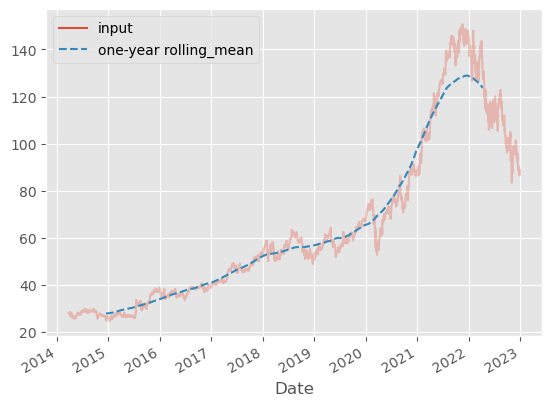

In [42]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean()})
ax = data.plot(style=['-', '--'])
ax.lines[0].set_alpha(0.3)

## *Expanding window*
 Contrairement à la *rolling window*,où la taille de la fenêtre reste fixe et se déplace à travers les données, une *expanding window* augmente progressivement en taille au fur et à mesure qu'elle se déplace à travers les données jusqu'à englober les données au complet. La méthode `expanding()` permet de spécifier à partir de combien de période on veut commencer à calculer l'aggrégation avec l'argument `min_periods`.  Voici le lien vers la documentation de cette méthode: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html
Cette technique est utilisée lorsqu'on veut avoir une tendance à long terme sur nos données.

In [43]:
sorted_goog=goog.sort_index()
sorted_goog

Date
2014-03-27    27.9230
2014-03-28    27.9995
2014-03-31    27.8485
2014-04-01    28.3580
2014-04-02    28.3500
               ...   
2022-12-23    89.8100
2022-12-27    87.9300
2022-12-28    86.4600
2022-12-29    88.9500
2022-12-30    88.7300
Name: Close, Length: 2208, dtype: float64

In [44]:
sorted_goog.expanding().mean()

Date
2014-03-27    27.923000
2014-03-28    27.961250
2014-03-31    27.923667
2014-04-01    28.032250
2014-04-02    28.095800
                ...    
2022-12-23    64.329490
2022-12-27    64.340193
2022-12-28    64.350220
2022-12-29    64.361367
2022-12-30    64.372403
Name: Close, Length: 2208, dtype: float64

In [45]:
# Exemple du calcul réalisé par expanding
# Date=2014-03-27
print(sorted_goog.iloc[0:2].mean())
#Date= 2014-03-28
print(sorted_goog.iloc[0:3].mean())
#Date= 2022-12-29
print(sorted_goog.iloc[:-1].mean())

27.96125
27.923666666666666
64.36136669687359


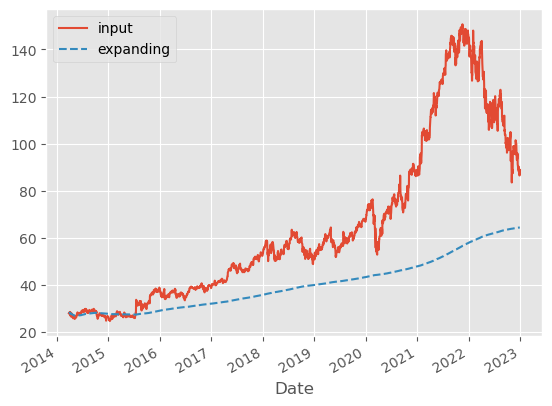

In [46]:
expanding = goog.sort_index().expanding()
data = pd.DataFrame({'input': goog,
                    'expanding':expanding.mean()})
ax = data.plot(style=['-', '--'])
#ax.lines[0].set_alpha(0.3)

Une alternative à avoir le même poids pour chacune des valeurs que l'on a dans une fenêtre est d'avoir une fonction qui pondère les données pour mettre plus de poids sur les données récente. La méthode `ewm` permet de réaliser ce type de fenêtre sur les séries temporelles. Voici le calcul qu'effectue cette fonction lorsqu'utilisé pour calculer une moyenne:
$$\text{EMWA}_t = (1 - \alpha) \times \text{EMWA}_{t-1} + \alpha \times X_t$$

Où: 
* $\text{EMWA}_t$ est la moyenne mobile pondérée exponentiellement à l'instant $t$
* $\text{EMWA}_{t-1}$ est la moyenne mobile pondérée exponentiellement à l'instant $t−1$.
* $X_t$  est la valeur actuelle de la série temporelle à l'instant $t$
* $\alpha$ est le facteur de pondération
Il existe plusieurs argument afin de spécifier comment on veut que $\alpha$ soit calculé.

Voici un lien vers la documentation qui permet de trouver les formules de alpha implémentées avec `ewm()`:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
La valeur de $\alpha$ influence le poids qu'on donne aux données récentes vs les anciennes. Un $\alpha$ plus proche de 0 donnera plus de poids aux observations anciennes tandis qu'un $\alpha$ plus élevé donnera du poids aux observations plus récentes.

<Axes: xlabel='Date'>

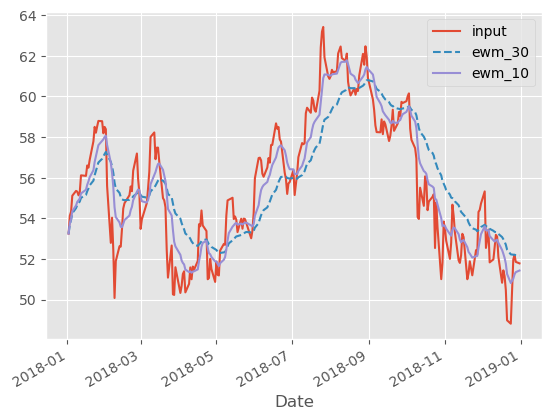

In [56]:
sorted_goog=goog['2018'].sort_index()
#alpha=2/(span+1)
ewm_30=sorted_goog.ewm(span=30).mean() #alpha=0.06
ewm_10=sorted_goog.ewm(span=10).mean() #alpha =0.18
#roll=sorted_goog.rolling(30,min_periods=1).mean()
data = pd.DataFrame({'input': sorted_goog,
                    'ewm_30':ewm_30,
                    'ewm_10':ewm_10})
data.plot(style=['-', '--','-'])

## Introduction à l'extraction de caractéristiques temporelles

Les caractéristiques temporelles d'une *time-serie* incluent divers aspects qui permettent de comprendre son comportement, son évolution et ses tendances au fil du temps. Voici quelques-unes des caractéristiques temporelles importantes d'une série temporelle :
* Tendance: la direction générale dans laquelle les données évoluent au fil du temps. Une tendance peut être ascendante, descendante ou horizontale (stationnaire). 
* Saisonnalité: variations régulières ou périodiques dans les données qui se répètent à des intervalles fixes, comme quotidiennement, mensuellement ou annuellement. La saisonalité peut être causée par des facteurs tels que les saisons, les jours de la semaine, ou d'autres cycles réguliers.
* Résidus: fluctuations aléatoires ou irrégulières dans les données qui ne peuvent pas être expliquées par la tendance ou la saisonnalité.

Comprendre ces caractéristiques temporelles est essentiel pour choisir des méthodes d'analyse et de modélisation appropriées afin de faire des prédictions à partir de *time-series*.

Il existe plusieurs façons décomposer une série temporelle pour obtenier les caractéristiques énoncées plus haut. Dans ce cours-ci, je traiterai seulement des deux modèles suivants:
* décomposition additive
* décomposition multiplicative

Dans une décomposition additive, la série est représentée comme la **somme** de la tendance, de la saisonnalité et du résidu. 

$$Y_t = T_t + S_t + R_t$$

Dans une décomposition additive, la série est représentée comme la **multiplication** de la tendance, de la saisonnalité et du résidu. 

$$Y_t = T_t \times S_t \times R_t$$

La décomposition additive est souvent utilisée lorsque les variations saisonnières restent constantes en termes absolus tout au long de la série, tandis que la décomposition multiplicative est utilisée lorsque les variations saisonnières augmentent proportionnellement au fil du temps.

La fonction `seasonal_decompose` de la librairie `statsmodels.tsa.seasonal` permet d'effectuer la décomposition. Voici le lien vers la documentation: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

Text(0, 0.5, 'y')

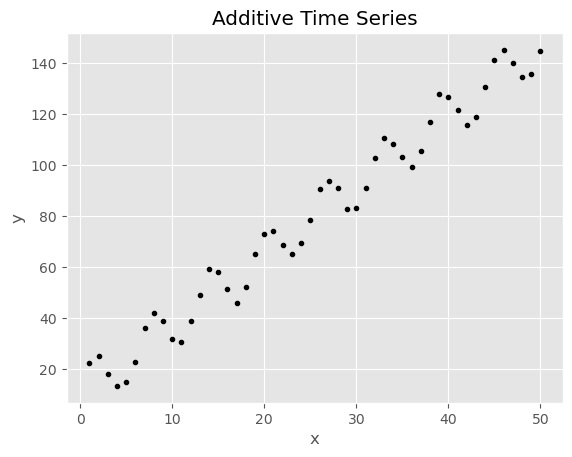

In [48]:
#Exemple Modélisation additive
import numpy as np
np.random.seed(10)
T_Series = np.arange(1, 51)
Trend = T_Series * 2.75
seasonality = 10 + np.sin(T_Series) * 10
np.random.seed(10) 
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))
additive_Tmodel = Trend + seasonality + residual
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("x")
plt.ylabel("y")

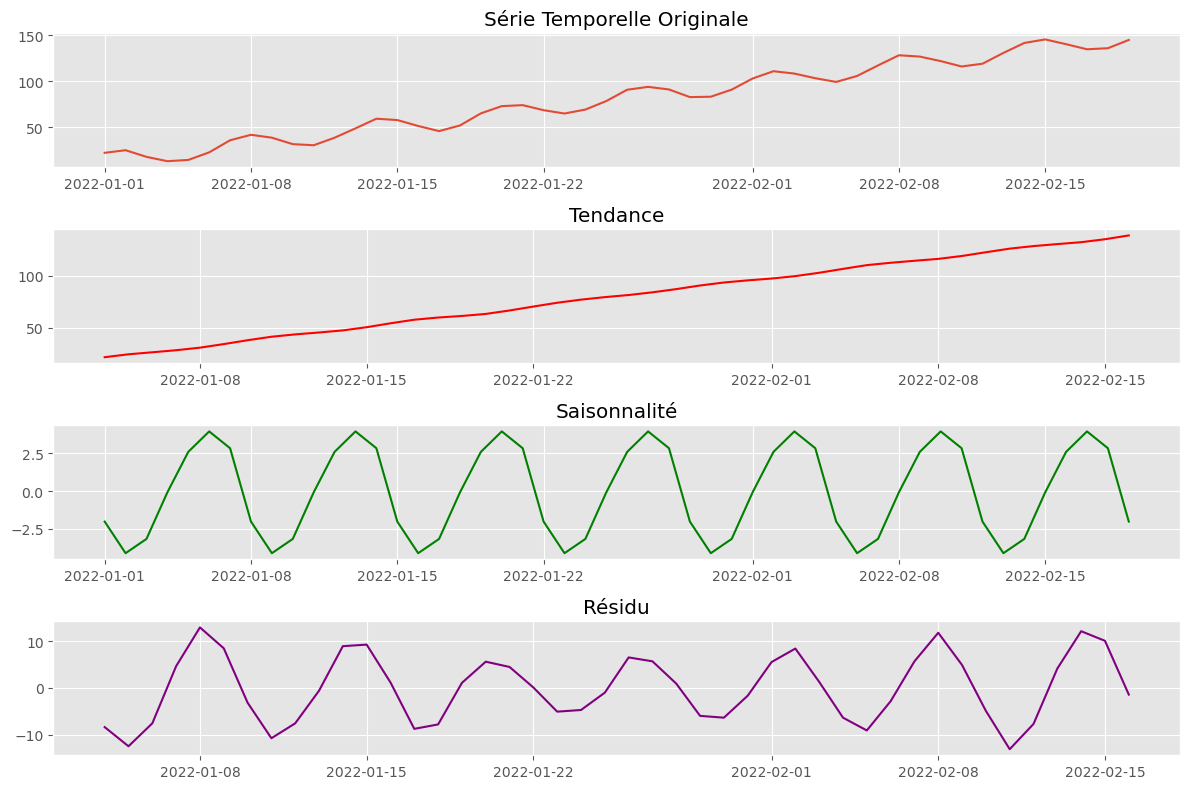

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Générer des données pour une série temporelle additive
date_rng = pd.date_range(start='2022-01-01', end='2022-02-19', freq='D')
data = {
    'date': date_rng,
    'value': additive_Tmodel
}


# Créer un DataFrame à partir des données
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Décomposer la série temporelle (décomposition additive)
result = seasonal_decompose(df['value'], model='additive')


# Afficher les composantes
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.title('Série Temporelle Originale')
plt.plot(df['value'], label='Série Temporelle')

plt.subplot(4, 1, 2)
plt.title('Tendance')
plt.plot(result.trend, label='Tendance', color='red')

plt.subplot(4, 1, 3)
plt.title('Saisonnalité')
plt.plot(result.seasonal, label='Saisonnalité', color='green')

plt.subplot(4, 1, 4)
plt.title('Résidu')
plt.plot(result.resid, label='Résidu', color='purple')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'y')

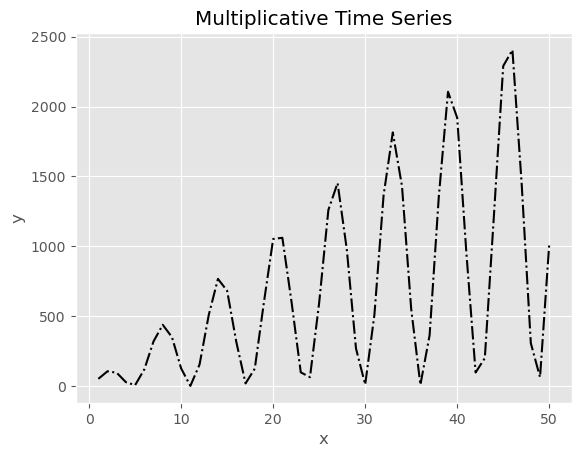

In [50]:
# résidu constant
ignored_residual = np.ones_like(residual)
T_Series = np.arange(1, 51)
Trend = T_Series * 2.75
seasonality = 10 + np.sin(T_Series) * 10
multiplicative_Tmodel = Trend * seasonality * ignored_residual
plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("x")
plt.ylabel("y")

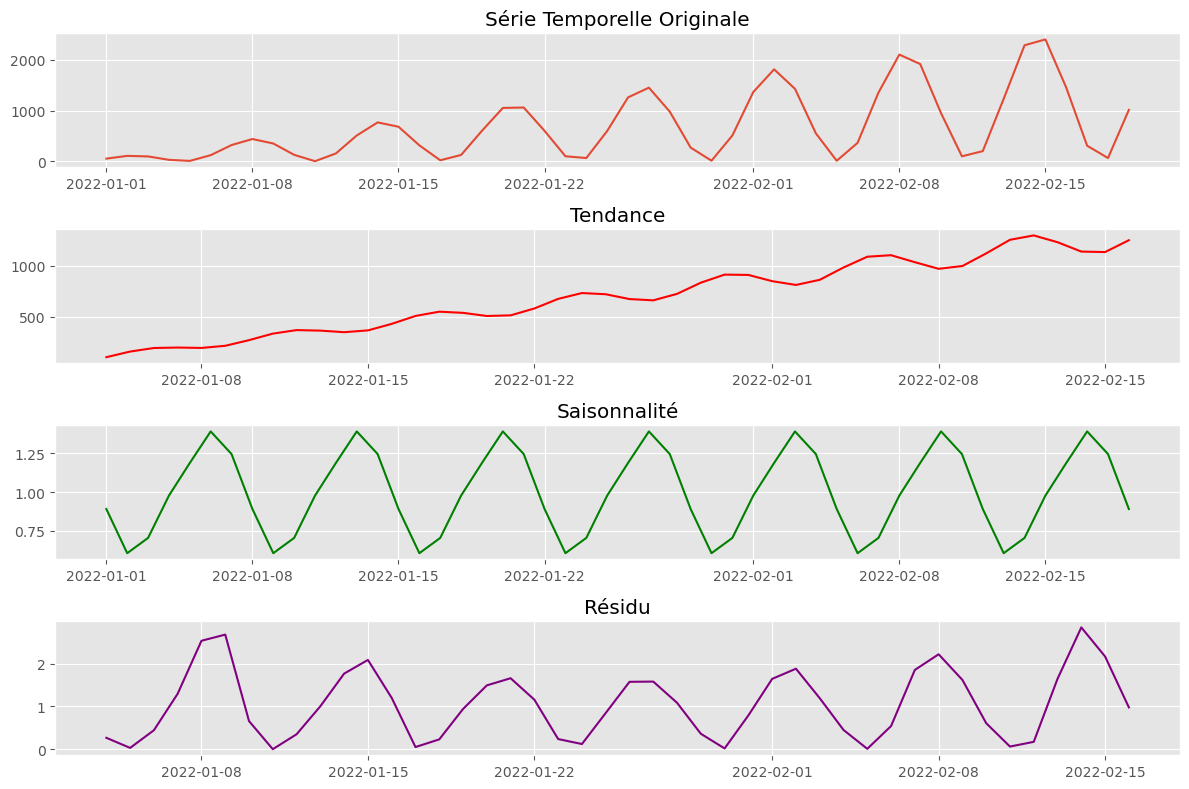

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Générer des données pour une série temporelle additive
date_rng = pd.date_range(start='2022-01-01', end='2022-02-19', freq='D')
data = {
    'date': date_rng,
    'value': multiplicative_Tmodel
}


# Créer un DataFrame à partir des données
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Décomposer la série temporelle (décomposition additive)
result = seasonal_decompose(df['value'], model='multi')


# Afficher les composantes
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.title('Série Temporelle Originale')
plt.plot(df['value'], label='Série Temporelle')

plt.subplot(4, 1, 2)
plt.title('Tendance')
plt.plot(result.trend, label='Tendance', color='red')

plt.subplot(4, 1, 3)
plt.title('Saisonnalité')
plt.plot(result.seasonal, label='Saisonnalité', color='green')

plt.subplot(4, 1, 4)
plt.title('Résidu')
plt.plot(result.resid, label='Résidu', color='purple')

plt.tight_layout()
plt.show()


## Stationnarité
La stationnarité est un concept important en statistiques et en séries temporelles. Une série temporelle est dite stationnaire si ses propriétés statistiques, telles que la moyenne, la variance et la structure de corrélation, restent constantes au fil du temps. En d'autres termes, une série temporelle stationnaire ne présente pas de tendance à long terme et ses caractéristiques statistiques restent constantes d'une période à l'autre.

La plupart des techniques de modélisation des séries temporelles supposent la stationnarité. Si une série temporelle n'est pas stationnaire, certains modèles peuvent ne pas fonctionner correctement.
L'analyse des tendances et des modèles saisonniers est plus facile sur une série stationnaire.
Les tests statistiques tels que le test de Dickey-Fuller augmenté (ADF) sont utilisés pour vérifier la stationnarité. Si la série n'est pas stationnaire, des transformations (comme la différenciation) peuvent être appliquées pour rendre la série stationnaire.

Comment Obtenir la Stationnarité :
* Différenciation : En prenant la différence entre des valeurs successives, on peut éliminer la tendance à long terme. (avec `shift`) 
* Transformation Logarithmique : Utile pour réduire les variations proportionnelles à un facteur constant.
* Moyenne Mobile : En utilisant une moyenne mobile (rolling window avec aggrégation de moyenne) pour lisser la série.
* Découpage en Sous-Périodes : Parfois, diviser la série en sous-périodes peut rendre les propriétés statistiques plus constantes.

### Dickey-Fuller augmenté (ADF)
Hypothèses (simplifiées):
H0: La série temporelle n'est pas stationnaire (il y a une tendance)
HA: La série temporelle est stationnaire

On peut effectuer ce test avec la fonction `adfuller` de la librairie `statsmodels.tsa.stattools`. Si la p-value obtenue est supérieur à 5%, notre série temporelle n'est pas stationnaire

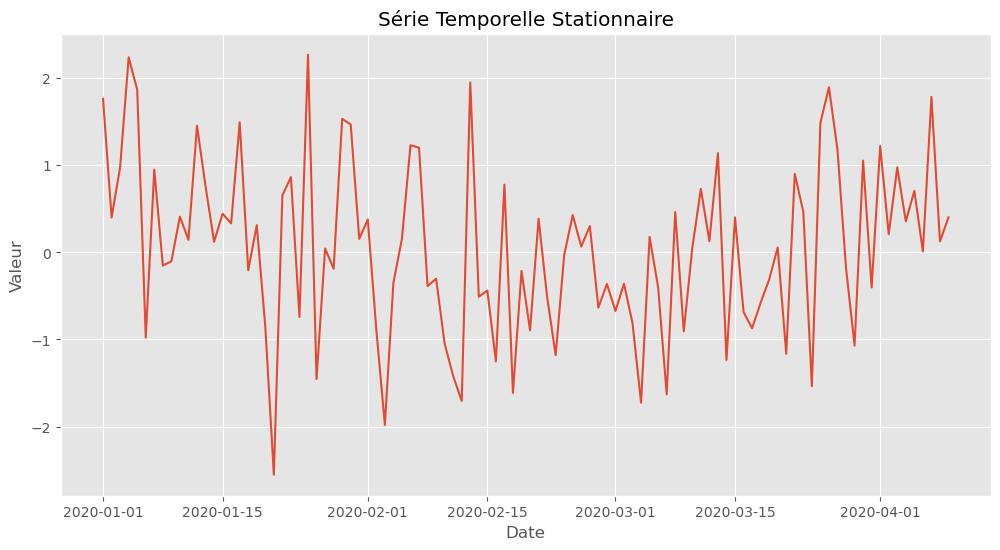

In [52]:
# Exemple stationnaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Générer une série temporelle stationnaire (par exemple, des valeurs aléatoires)
np.random.seed(0)  # Fixer la graine pour la reproductibilité
n = 100  # Nombre d'observations
stationary_data = np.random.normal(loc=0, scale=1, size=n)  # Série temporelle stationnaire

# Créer un DataFrame avec la série temporelle stationnaire
stationary_series = pd.Series(stationary_data, index=pd.date_range(start='2020-01-01', periods=n, freq='D'))

# Tracer la série temporelle stationnaire
plt.figure(figsize=(12, 6))
plt.plot(stationary_series)
plt.title('Série Temporelle Stationnaire')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()


In [53]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stationary_series)

print('p-value',adft[1])

p-value 1.1285451053950947e-15


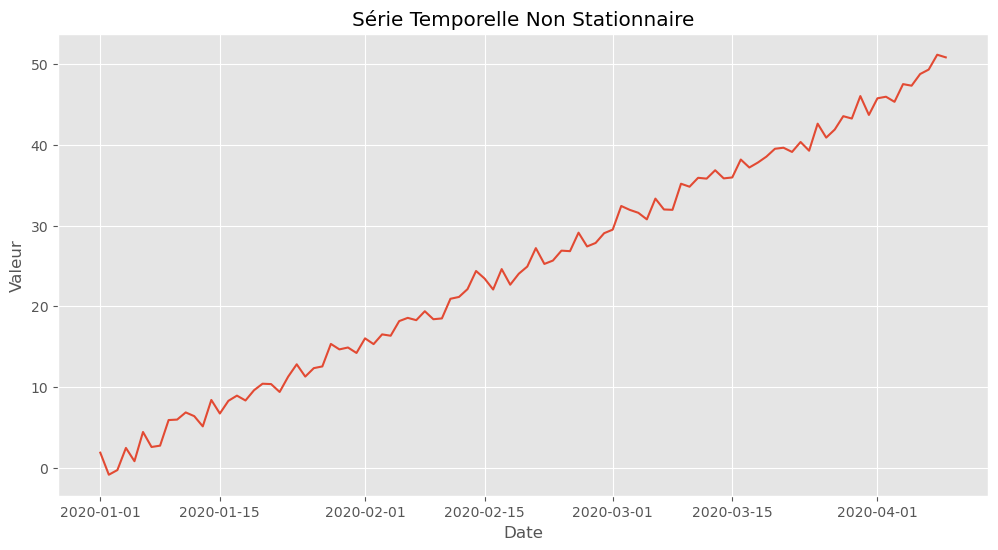

In [54]:
# série non stationnaire
# Générer une série temporelle non stationnaire (par exemple, avec une tendance linéaire)
t = np.arange(0, n)
non_stationary_data = 0.5 * t + np.random.normal(loc=0, scale=1, size=n)  # Tendance linéaire avec bruit

# Créer un DataFrame avec la série temporelle non stationnaire
non_stationary_series = pd.Series(non_stationary_data, index=pd.date_range(start='2020-01-01', periods=n, freq='D'))

# Tracer la série temporelle non stationnaire
plt.figure(figsize=(12, 6))
plt.plot(non_stationary_series)
plt.title('Série Temporelle Non Stationnaire')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()


In [55]:
adft = adfuller(non_stationary_series)

print('p-value',adft[1])

p-value 0.9915286779102706
